# Hidden Markov Models


### This project is about implementing a HMM for speach recognition.We have several voices of numbers 0-9 that six people has recorded.
### It has three steps:
   ##### 1) Preprocessing the voices and extracting some features.
   ##### 2) Implementing HMM with libraries.
   ##### 3) Implementing HMM manually .
### There are several ways for evaluating our model:
   ##### 1) 1F 
   ##### 2) Recall
   ##### 3)Precision 
   ##### 4) Accuracy Score

## 1) Preprocessing
#### There are many features such as Zero Crossing Rate ,Chroma features, Mel-Spectogram & MFCCs.In this project we work with mfccs.

In [120]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import pandas as pd

In [121]:
num_of_iter = 10
TOP_DB = 40
TEST_SIZE = 0.2
# target_var = "speaker_name"
target_var = "digit_label"
random_plot = 1

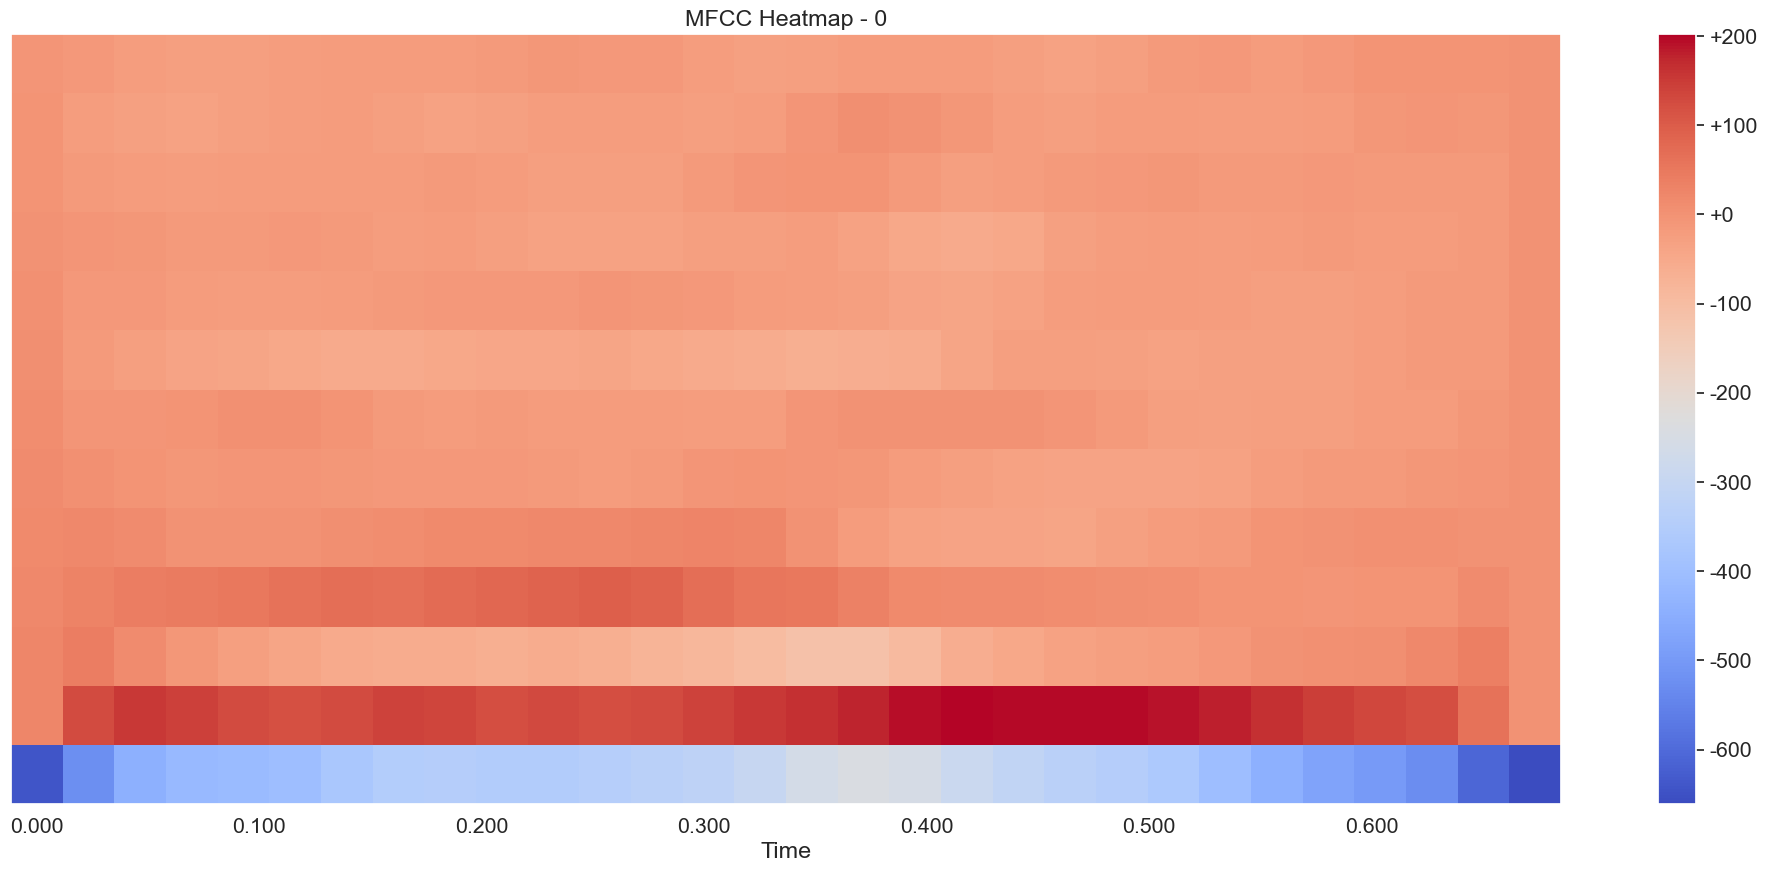

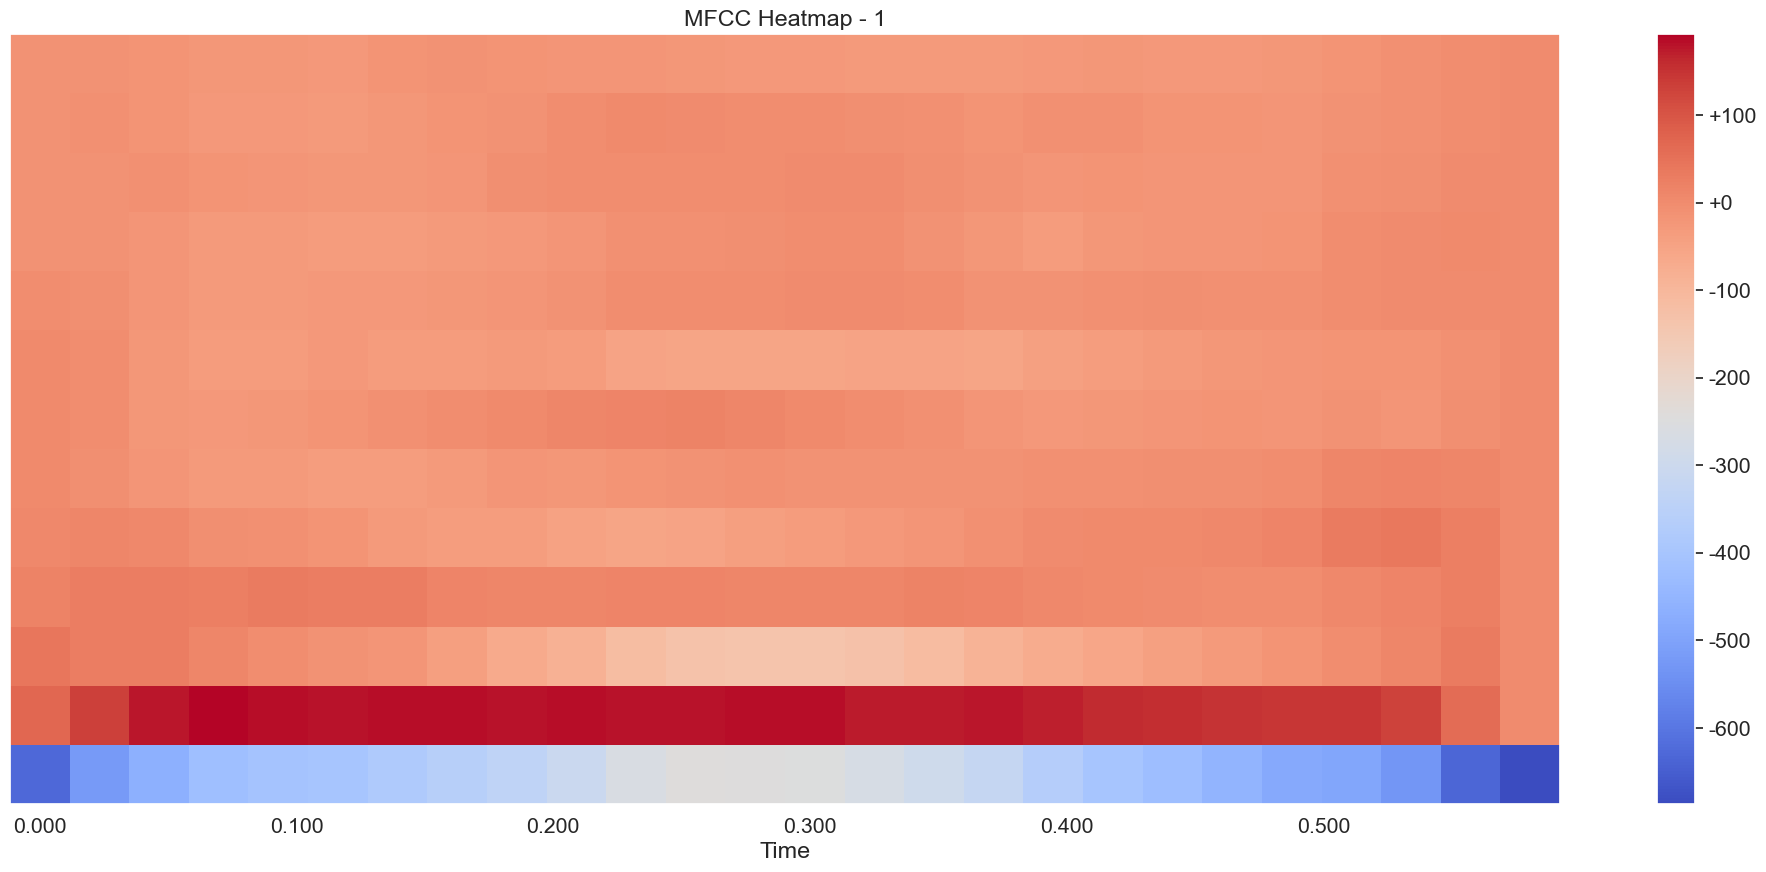

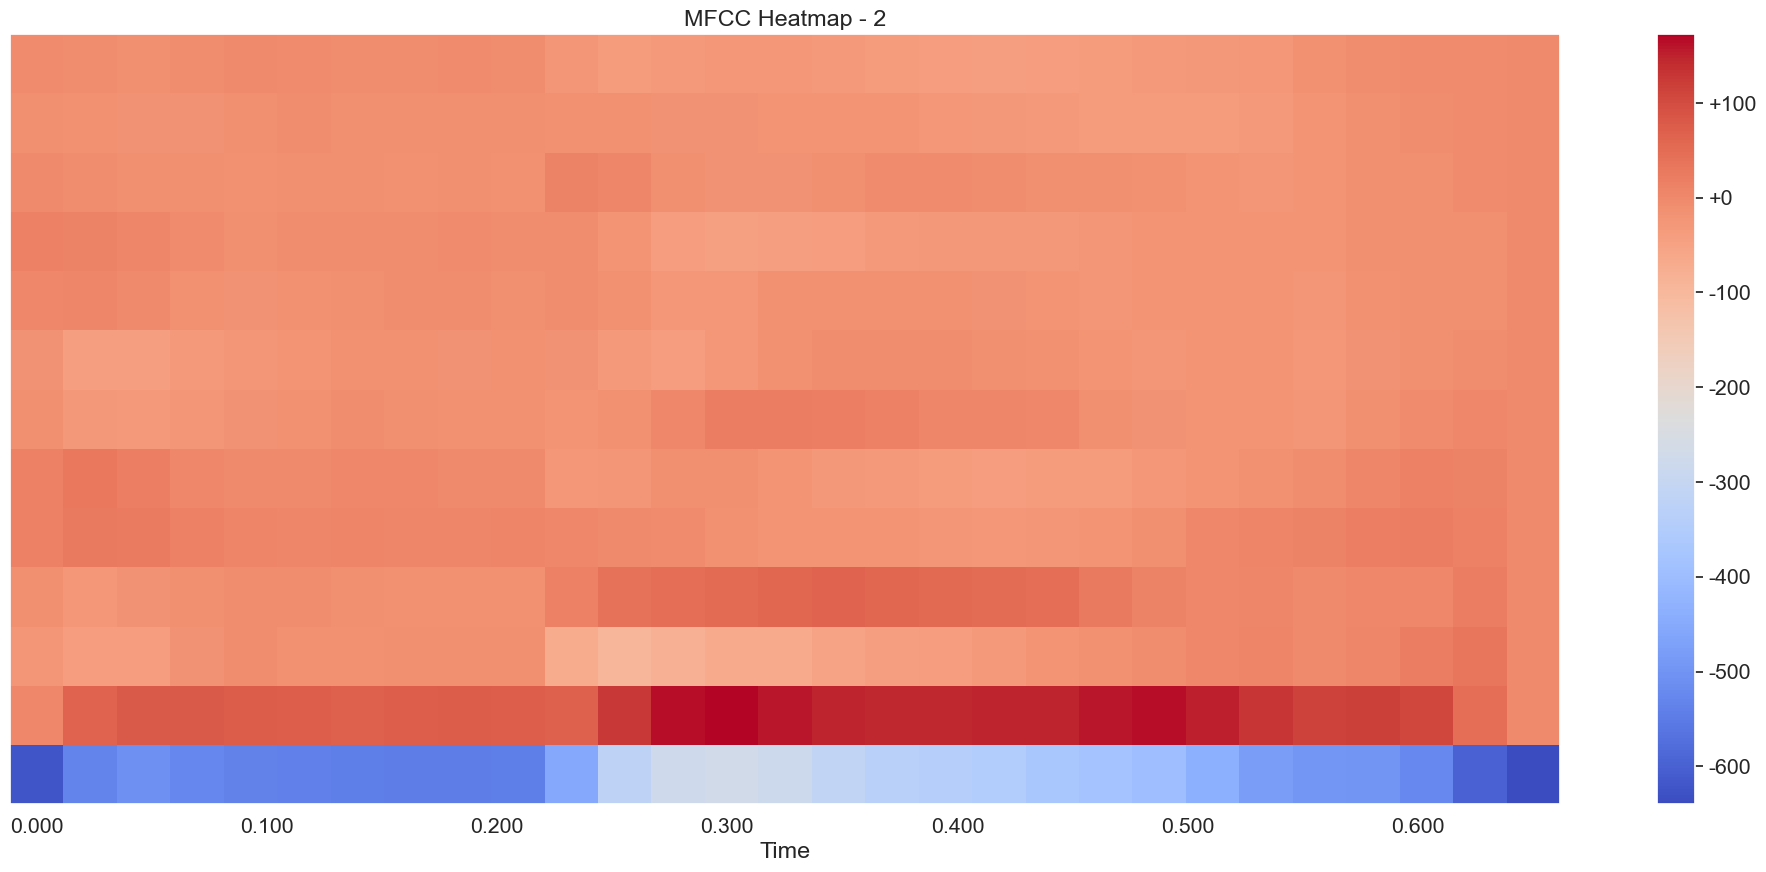

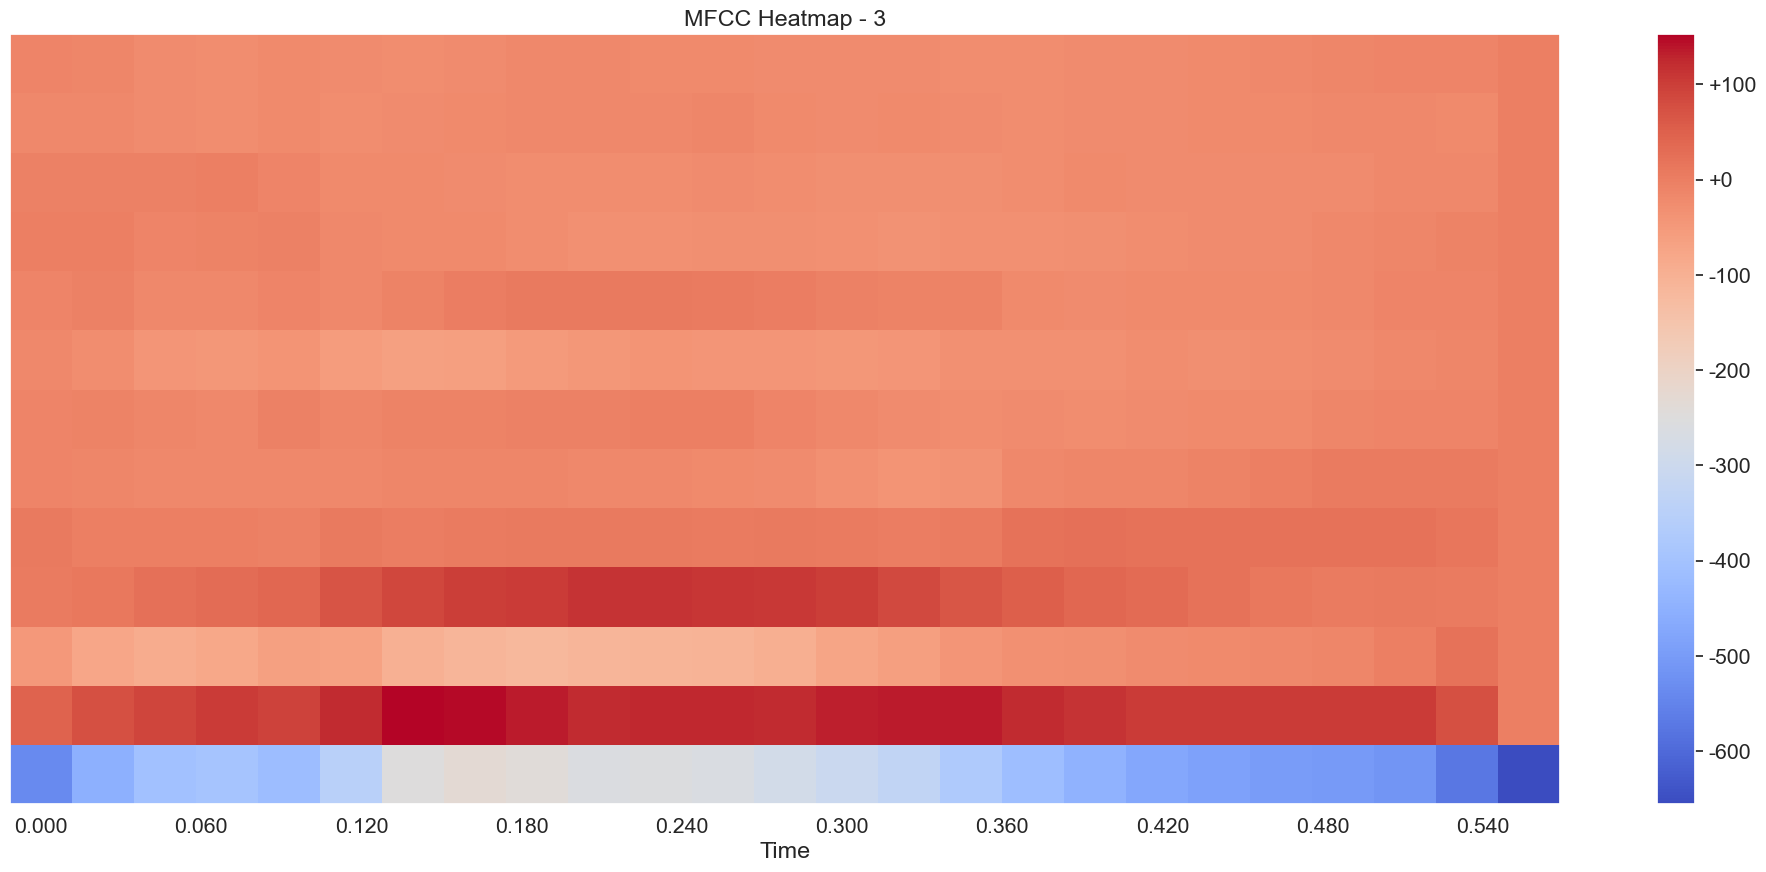

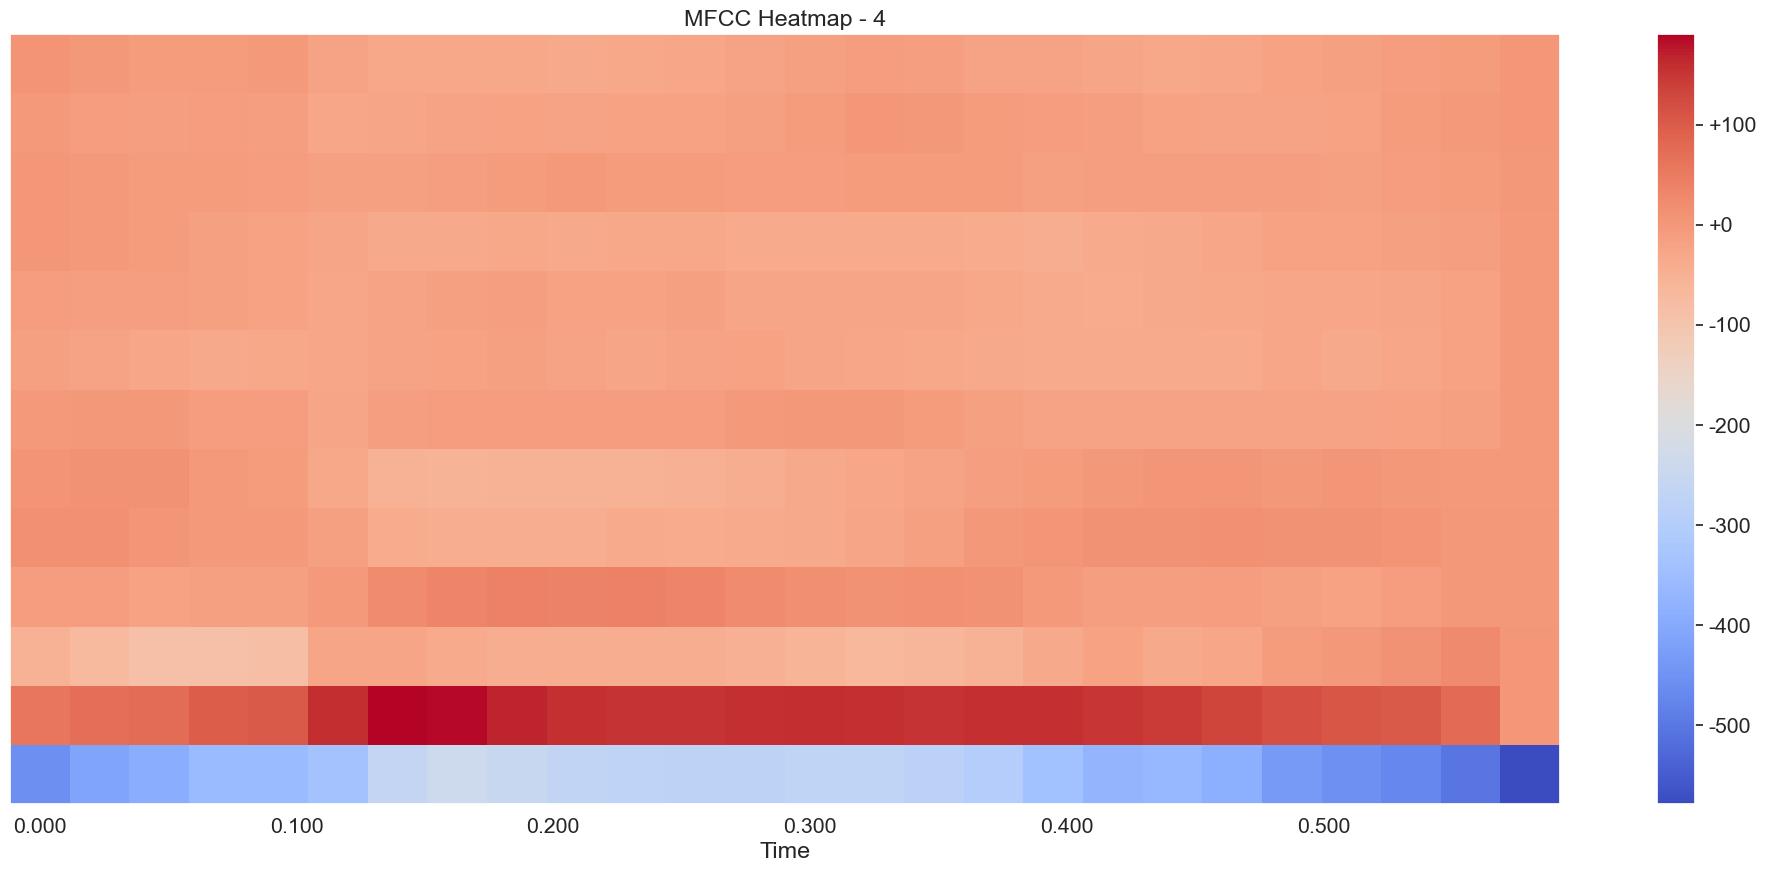

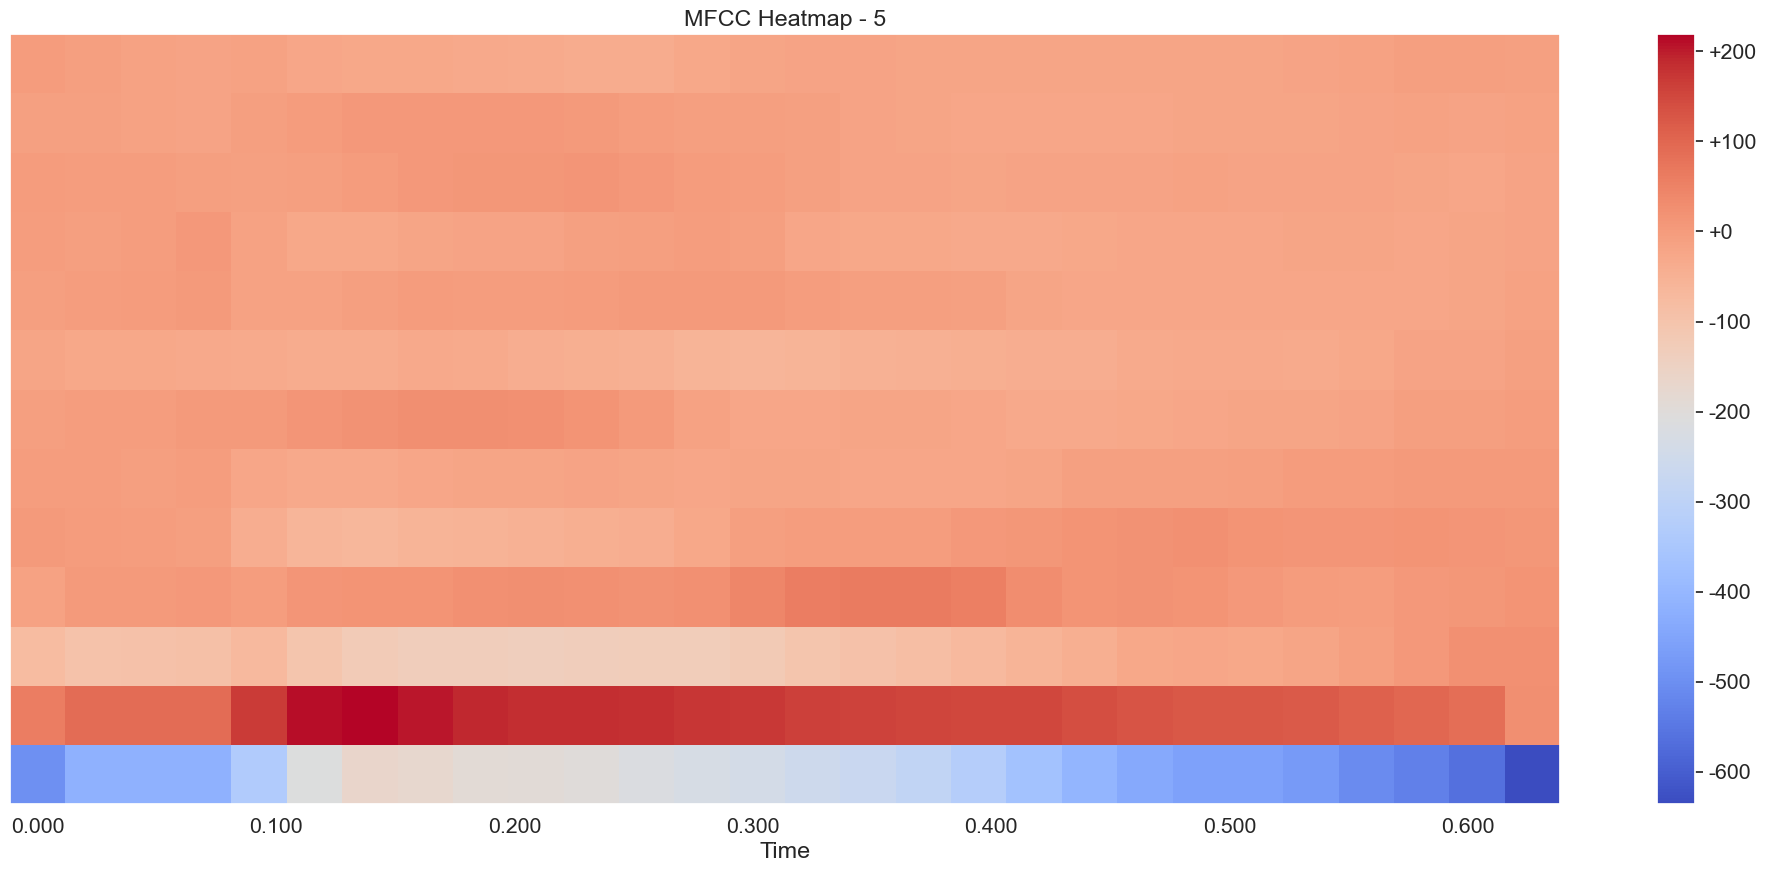

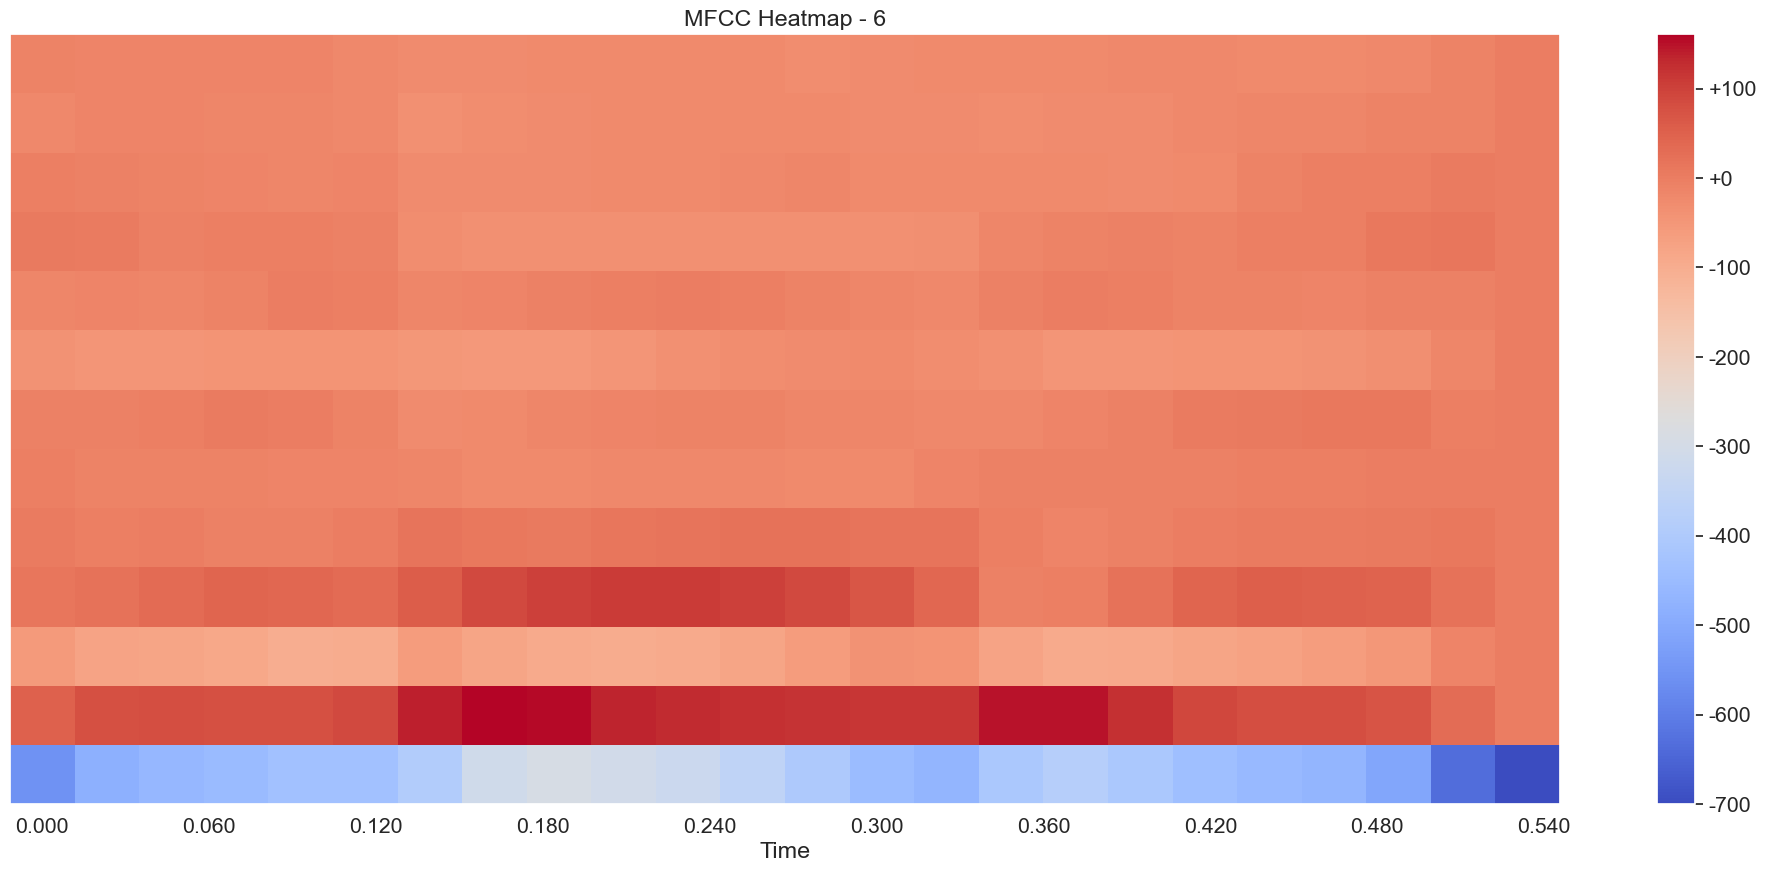

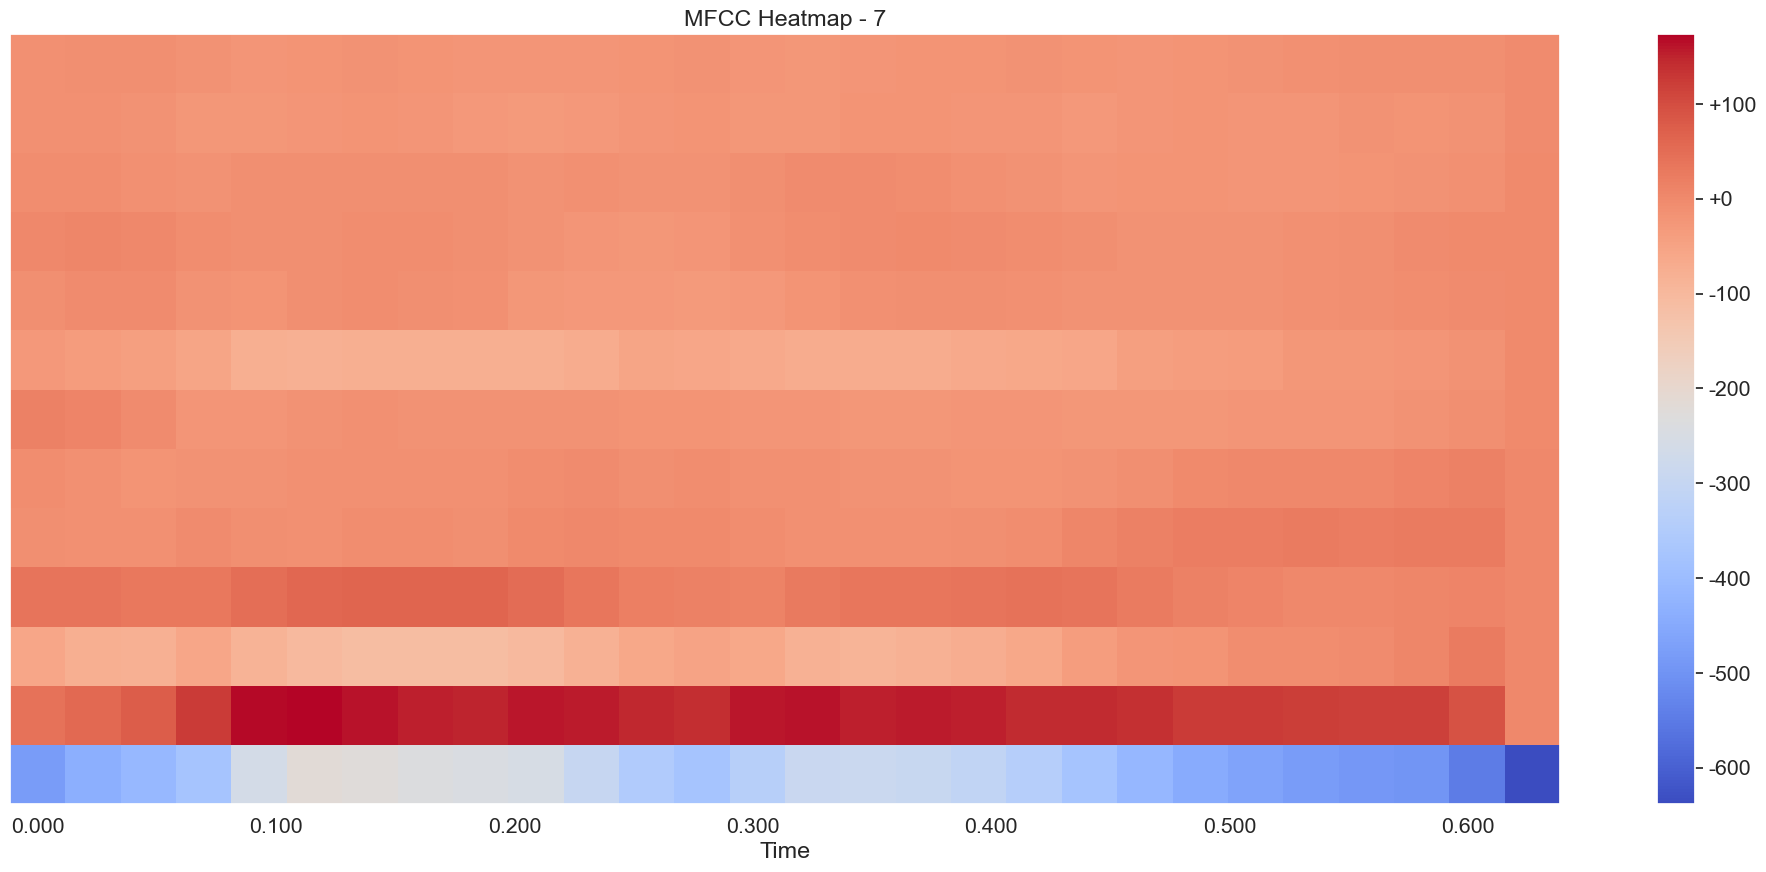

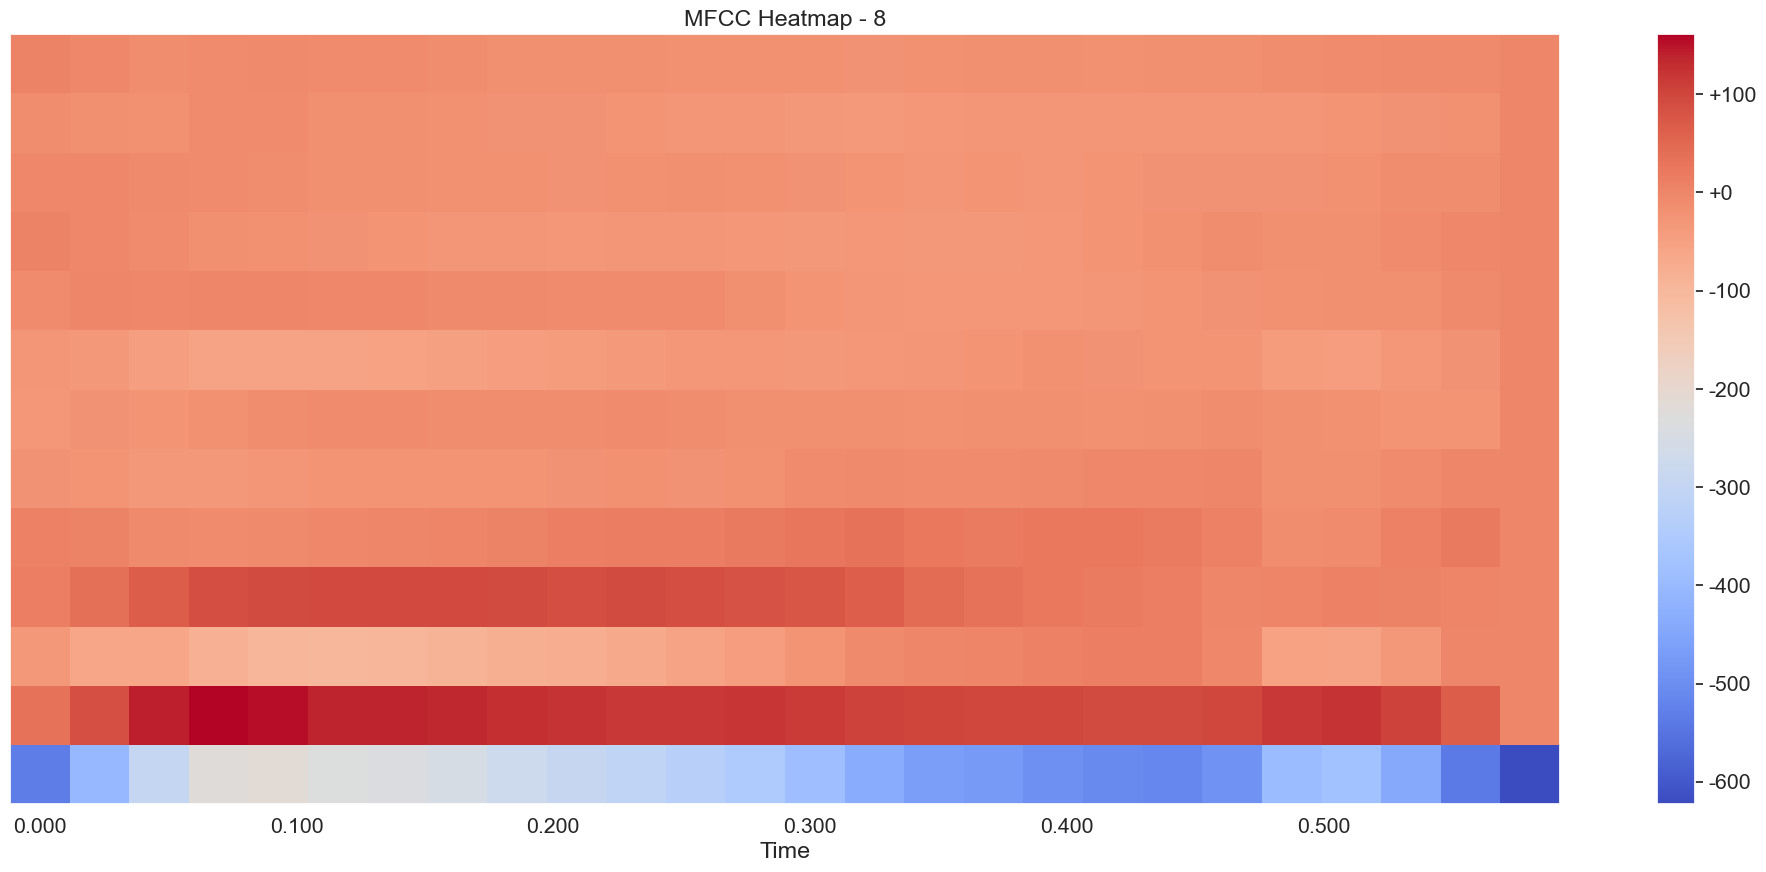

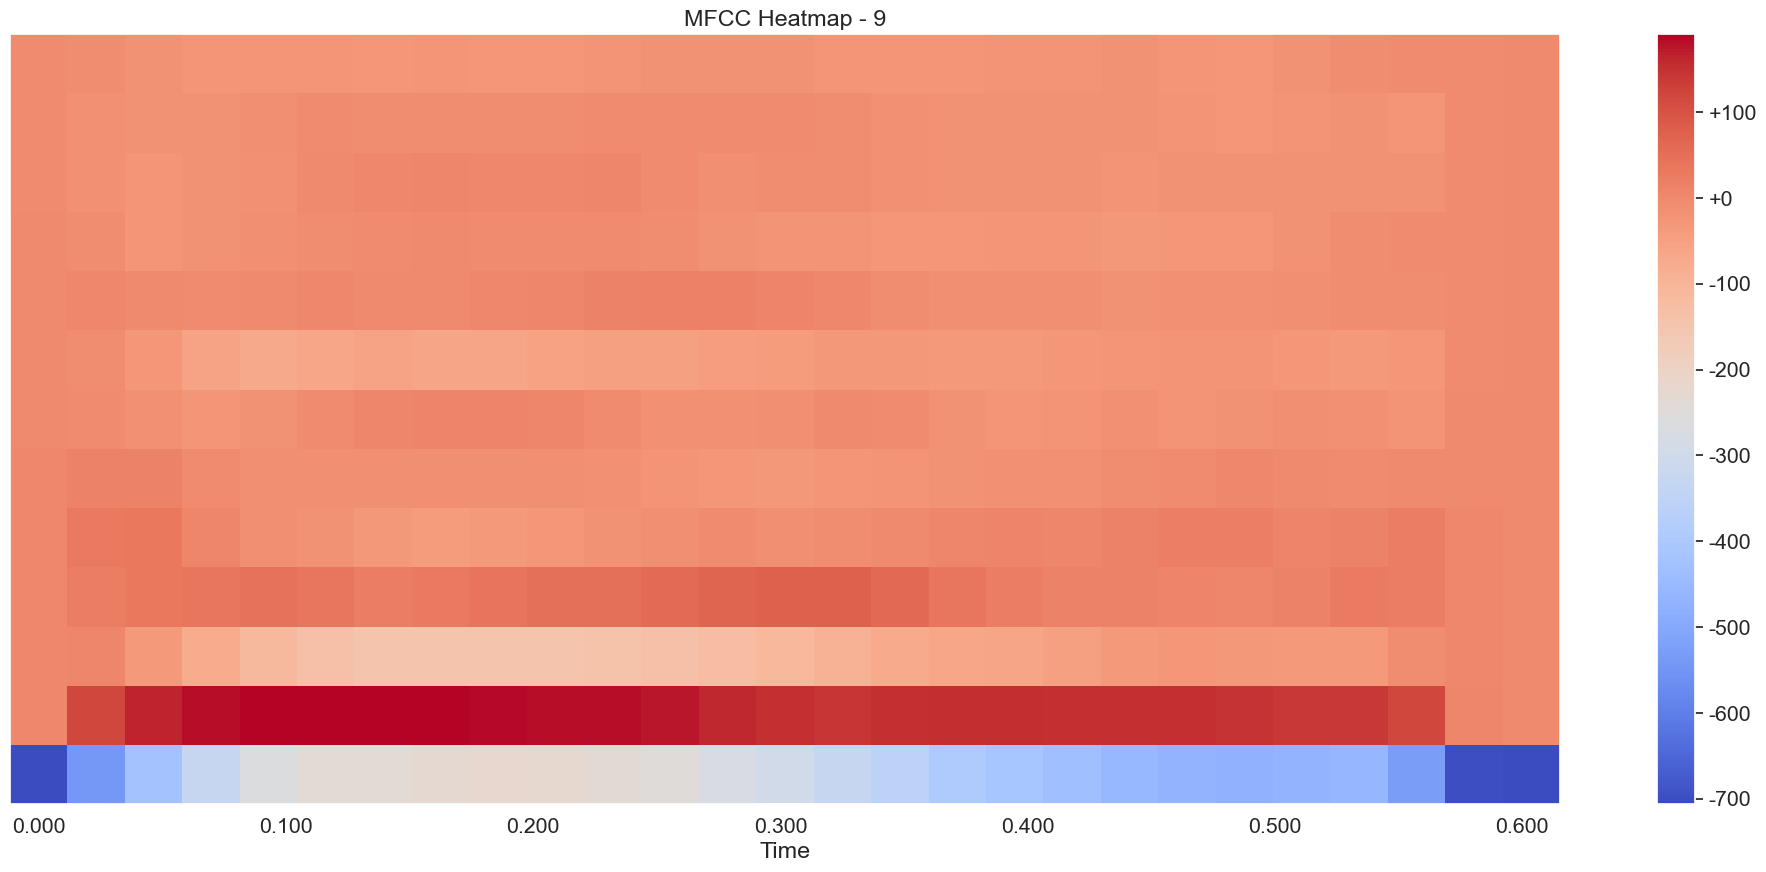

In [122]:
audio_files = glob('./voices/recordings/*.wav')
if (target_var == "speaker_name"):
    first_iter = 60
    second_iter = 50
    num_of_states = 6
    part_nums = 100
    num_of_train = 400
    genre_lists = {"george":[], "jackson":[], "lucas":[], "nicolas":[],"theo":[],"yweweler":[]}
    genre_lists_trans = {"george":[], "jackson":[], "lucas":[], "nicolas":[],"theo":[],"yweweler":[]}
elif(target_var == "digit_label"):
    first_iter = 10
    second_iter = 300
    num_of_states = 10  
    part_nums = 60
    num_of_train = 240
    genre_lists = {"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[],"8":[],"9":[]}
    genre_lists_trans = {"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[],"8":[],"9":[]}
    
for file in range(0,first_iter):
    mfcc_list = []
    mfcc_trans = []
    for j in range(0,second_iter):
        y, sr = librosa.load(audio_files[file *second_iter + j])
        y_tr, index = librosa.effects.trim(y, top_db=TOP_DB)
        mfccs = librosa.feature.mfcc(y=y_tr, n_mfcc=13, sr=sr)     
        mfcc_list.append(mfccs)
        mfcc_transposed = mfccs.T 

        temp_name = ""
        mfcc_trans.append(mfcc_transposed)
        if ( target_var == "speaker_name"):
            name = audio_files[file *second_iter + j]
            under  = name.rindex("_")
            temp_name = name[20:under]
            name = name[22:under]
        elif (target_var == "digit_label"):
            name = audio_files[file * second_iter + j][20:21]
            temp_name = name

        if (j == random_plot ):
            plt.figure(figsize=(25, 10))
            plt.title(f"MFCC Heatmap - {temp_name}")
            librosa.display.specshow(mfccs, 
                                    x_axis="time",
                                    sr=sr)
            plt.colorbar(format="%+2.f")
            plt.show()
            # print(name)
            plt.savefig(f"{temp_name}")#f"mffcs_heatmap/{name}.png"
            plt.close()

    genre_lists[name] += mfcc_list
    genre_lists_trans [name] += mfcc_trans


### Q1. Is segmentation usefull for this dataset ? Why?
Segmentation is good when we don't have enough data and we want to add some extra data to our dataset.With segmentation we can have data with the same amount of time or memory or anything which is important to us.Here we have enough data so we don't need segmentation.
 

### Q2. Search about coming features and describe how they relate : MFCCS, Zero Crossing Rate,mel-spectogram,chroma-features.

### Mel-Spectogram
A mel-spectrogram is a representation of an audio signal in the frequency domain, where the frequency axis is converted to the mel scale, which is a perceptual scale of pitches. Here's an explanation of mel-spectrogram and its use in speech recognition:
1. **Mel Scale**: The mel scale is a nonlinear transformation of frequency designed to mimic the human auditory system's perception of pitch. It is based on psychoacoustic experiments that measure the perceived differences in pitch between tones. The mel scale is logarithmic and nonlinear, with more resolution at lower frequencies and less resolution at higher frequencies.

2. **Mel-Spectrogram**: A mel-spectrogram is obtained by applying the mel scale transformation to the spectrogram of an audio signal. A spectrogram represents the intensity of frequencies in the audio signal over time, typically obtained through the Short-Time Fourier Transform (STFT). By converting the frequency axis of the spectrogram to the mel scale, the mel-spectrogram provides a more perceptually relevant representation of the audio signal.

3. **Use in Speech Recognition**: Mel-spectrograms are widely used in speech recognition systems as feature representations of audio signals. They capture important information about the spectral content of the speech signal in a form that is more suitable for human perception. Mel-spectrogram features are often fed into machine learning models, such as deep neural networks, for tasks like automatic speech recognition (ASR).
4. **Advantages**: Mel-spectrograms help in capturing the relevant acoustic characteristics of speech signals while reducing the dimensionality of the feature space compared to raw audio waveforms. They also emphasize perceptually important features while suppressing irrelevant variations, which can improve the robustness and accuracy of speech recognition systems.
5. **In summary**: mel-spectrograms provide a perceptually relevant representation of audio signals, particularly speech, and are widely used as features in speech recognition systems due to their effectiveness in capturing important acoustic information.c information.

### Zero Crossing Rate
Zero crossing rate (ZCR) is a feature commonly used in speech and audio signal processing. Here's an explanation of zero crossing rate and its use in speech recognition:

1. **Definition**: Zero crossing rate is a measure of how frequently the amplitude of a signal changes its sign. In other words, it calculates the rate at which the signal crosses the zero axis in a given time frame. A signal with more rapid changes in amplitude will have a higher zero crossing rate.

2. **Calculation**: To calculate the zero crossing rate, the audio signal is divided into short overlapping frames, typically with a duration of 10-30 milliseconds. Within each frame, the number of times the signal crosses the zero axis is counted. The zero crossing rate is then computed as the average number of zero crossings per frame.

3. **Use in Speech Recognition**: Zero crossing rate can be used as a feature in speech recognition systems to capture certain characteristics of speech signals. Although it is not as commonly used as other features like Mel-Frequency Cepstral Coefficients (MFCCs), it can provide useful information about the pitch and timbre of the speech signal.
4. **Applications**: Zero crossing rate has been used in various speech and audio processing tasks, including speaker identification, emotion recognition, and language classification. In speech recognition, it can help distinguish between voiced and unvoiced speech segments and provide additional cues for feature extraction.
5. **Advantages and Limitations**: The advantage of zero crossing rate is its simplicity and computational efficiency. It requires minimal computational resources compared to more complex features like MFCCs. However, its effectiveness may be limited in noisy environments or with certain types of speech signals, as it does not capture spectral information.

6. **In summary**:Zero crossing rate is a simple feature that can provide useful information about the temporal characteristics of speech signals. While it may not be as informative as other features like MFCCs, it can still complement feature sets in speech recognition systems and other audio processing applications.ing applications.

### Chroma-features
Chroma features are representations of audio signals that capture the pitch content or musical notes present in the signal. These features are derived from the chromagram, which is a representation of the energy distribution of musical notes or pitch classes over time.

Here's an explanation of chroma features and their use in speech recognition:

1. **Chromagram**: A chromagram is a two-dimensional representation of an audio signal, where one axis represents time and the other axis represents the twelve pitch classes or musical notes. Each bin in the chromagram corresponds to the energy or presence of a particular pitch class at a specific point in time.

2. **Chroma Features**: Chroma features are derived from the chromagram and typically involve summarizing the energy distribution across the twelve pitch classes over time. Common chroma features include chroma vectors, chroma energy normalized statistics (CENS), and chroma variants like Chroma Energy Normalized Differential Hamming (CEN-Hamming).

3. **Use in Speech Recognition**: While chroma features are originally developed for music analysis tasks such as chord recognition and genre classification, they have also found applications in speech recognition. In speech recognition, chroma features can capture prosodic or intonation information in speech signals, which is useful for tasks such as speaker identification and emotion recognition.
4. **Applications**: Chroma features have been used in various speech and audio processing tasks, including speaker diarization, language identification, and automatic speech recognition (ASR). In ASR, chroma features can provide complementary information to other acoustic features like Mel-Frequency Cepstral Coefficients (MFCCs) and improve the robustness of the system, particularly in scenarios where prosody plays a significant role.
5. **Advantages and Limitations**: The advantage of chroma features is their ability to capture pitch-related information in speech signals, which can be important for tasks involving intonation, stress, and rhythm. However, chroma features may not be as effective in capturing spectral or phonetic information as other features like MFCCs, and their effectiveness may vary depending on the specific characteristics of the speech signal and the task at hand.
6. **In summary**: Chroma features provide a way to represent the pitch content of audio signals, including speech, and can be useful in speech recognition tasks, particularly for capturing prosodic information and improving the robustness of the system.ness of the system.

### Mel-Frequency Cepstral Coefficients (MFCCs)
Mel-Frequency Cepstral Coefficients (MFCCs) are a widely used feature representation in speech and audio signal processing. Here's an explanation of MFCCs and their use in speech recognition:
1. **MFCC Extraction**: MFCCs are derived from the spectrum of an audio signal. The process involves several steps:
    1. **Pre-emphasis**:The signal is passed through a pre-emphasis filter to boost the higher frequencies.
    2. **Framing**:The pre-emphasized signal is divided into short overlapping frames.
    3. **Windowing**: Each frame is multiplied by a window function, typically a Hamming window, to reduce spectral leakage.
    4. **Fourier Transform**: The Fast Fourier Transform (FFT) is applied to each frame to obtain the magnitude spectrum.
    5. **Mel Filterbank**: The spectrum is passed through a bank of Mel filters, which are triangular filters spaced evenly on the Mel                                                                 scale, to mimic the human auditory system's frequency sensitivity.
    6. **Logarithmic Compression**: The logarithm of the energy in each filterbank is computed to approximate human perception of loudness.
    7. **Discrete Cosine Transform (DCT)**: The log-filterbank energies are transformed using the DCT, and the resulting coefficients are the MFCCs.
          
2. **Use in Speech Recognition**: MFCCs are used as feature representations in automatic speech recognition (ASR) systems. They capture important characteristics of the speech signal related to its spectral content and temporal dynamics. The use of MFCCs in ASR has several advantages:
    1. **Compact representation**: MFCCs reduce the dimensionality of the feature space compared to the raw audio waveform, making them                                                     computationally efficient.
    2. **Robustness to noise**: By capturing spectral characteristics rather than precise timing information, MFCCs are less sensitive                                                   to noise and other distortions in the signal.
    3. **Phonetically informative**: MFCCs capture phonetic information present in the speech signal, making them suitable for                                                                discriminating between different phonemes and words.
    4. **Perceptually motivated**: The Mel filterbank and logarithmic compression steps in MFCC extraction are motivated by human                                                           auditory perception, making MFCCs well-suited to capturing perceptually relevant features of speech.

   
3. **Applications**: MFCCs are widely used in various speech and audio processing tasks, including speaker recognition, language identification, emotion recognition, and keyword spotting. In ASR systems, MFCCs are typically fed into machine learning models, such as Hidden Markov Models (HMMs) or deep neural networks, for speech recognition and transcription.

4. **In summary**: MFCCs are a powerful feature representation for speech signals, widely used in speech recognition systems due to their effectiveness in capturing important spectral and temporal characteristics of the speech signal while being computationally efficient and robust to noise.t and robust to noise.

### The relationship between four features:

Let's explore the relationships between the four features mentioned: MFCCs, zero crossing rate (ZCR), mel-spectrogram, and chroma features.

1. **MFCCs and Zero Crossing Rate (ZCR)**: MFCCs capture the spectral characteristics of the speech signal, providing information about the distribution of energy in different frequency bands over time. On the other hand, ZCR captures the rate at which the speech signal crosses the zero axis, providing information about the temporal dynamics and changes in the speech signal's waveform.
While MFCCs focus on spectral features, ZCR provides information about the temporal characteristics of the speech signal. Together, they can offer a comprehensive representation of the speech signal by capturing both spectral and temporal aspects.

2. **MFCCs and Mel-Spectrogram**: Both MFCCs and mel-spectrogram are representations of the speech signal in the frequency domain. However, they differ in their specific characteristics and the information they capture.
MFCCs are derived from the mel-spectrogram and are a compact representation of the spectral envelope of the speech signal. They are commonly used in speech recognition tasks due to their effectiveness in capturing important spectral features while reducing dimensionality.
Mel-spectrogram, on the other hand, provides a detailed representation of the spectral content of the speech signal over time. It is useful for tasks where fine-grained spectral information is needed, such as music genre classification or sound source separation.

3. **MFCCs and Chroma Features**: Both MFCCs and chroma features capture information about the pitch content of the speech signal. However, they differ in their representation and the specific aspects of pitch they focus on.
MFCCs provide a compact representation of the spectral envelope of the speech signal, capturing broad spectral features related to the pitch and timbre of the speech.
Chroma features, on the other hand, focus specifically on the pitch classes or musical notes present in the speech signal, providing a more focused representation of the harmonic content and musical aspects of the speech.
While MFCCs are commonly used in speech recognition tasks, chroma features are more commonly used in music analysis tasks such as chord recognition and genre classification.

4. **In summary**: Each of the mentioned features captures different aspects of the speech signal, including spectral, temporal, and pitch-related characteristics. By combining these features, we can create a comprehensive representation of the speech signal that leverages their complementary strengths for various speech and audio processing tasks. processing tasks.

### Q3.Examine the robustness and sensitivity of MFCCs to changes in audio signals.

1. **Robustness**: MFCCs are designed to capture essential characteristics of the audio signal while being robust to variations caused by noise, channel distortions, and other environmental factors. They achieve this by simulating the human auditory system's response, which emphasizes relevant information while minimizing the effects of irrelevant variations. Therefore, MFCCs are generally robust features that can effectively represent speech signals under various conditions.

2. **Sensivity**:Although MFCCs are robust to many types of variations, they can still be sensitive to certain changes in the audio signal. For example, abrupt changes in the signal, such as sudden shifts in pitch or volume, may affect the MFCCs' representation of the signal. Additionally, changes in the characteristics of the speech, such as accent or speaking rate variations, can influence the MFCCs' effectiveness in capturing relevant information.
Overall, while MFCCs demonstrate robustness to many environmental factors, they may still exhibit sensitivity to specific changes in the audio signal, particularly those that significantly alter the signal's spectral characteristics.ristics.

### Q4.Is there any special case in which mfccs are less efficient ?

Yes, there are certain conditions where MFCC coefficients may have reduced efficiency as extracted features. Some factors that could lead to decreased performance of MFCCs in some cases includ:
1. **Unnatural changes in the audio signal**: Changes such as severe noise, interference present in the environment, or constant fluctuations in the signal level may lead to a decrease in the effectiveness of MFCCs. 

2. **Non-stationary signals**: If the audio signal exhibits non-stationary behavior, meaning its statistical properties change over time, MFCCs may not adequately capture its characteristics.

3. **Lack of discriminative power**: In certain classification tasks, particularly those involving highly similar sounds or complex patterns, MFCCs alone may not provide sufficient discriminative power to differentiate between classes.
4. **Mismatched feature extraction parameters**: In cases where the parameters used for MFCC extraction are not well-suited to the characteristics of the audio signal or the specific task at hand, the resulting coefficients may not effectively represent the signal.e signal.

### Q5. Why are the frames used in MFCC calculation similar to each other?
1. **Time Localization**: The audio signal is divided into frames to capture short-time variations. Each frame typically lasts for a few milliseconds (e.g., 20-40 milliseconds). By analyzing the signal in short segments, we can capture changes in the sound characteristics over time. 

2. **Overlap**: There is usually an overlap between adjacent frames. Instead of treating each frame as an independent unit, a common approach is to shift the frame window by a certain amount (e.g., 50% overlap) and calculate MFCC features for each shifted frame. This overlapping ensures that each frame captures information from both the current segment and the previous segment, allowing for better temporal resolution and smoother transitions.

3. **Stationarity Assumption**: MFCC assumes that the audio signal is approximately stationary within each frame. This means that the statistical properties (such as mean and variance) of the signal are relatively constant within a short time window. By assuming stationarity, we can extract meaningful features from each frame that represent the underlying spectral content of the audio.

### Q6. Why are 12 or 13 MFCC initial coefficients used in most projects related to sound?
1. **Dimensionality Reduction:** The goal of MFCC computation is to extract a compact representation of the spectral content of an audio signal. By applying a logarithmic scale and performing a Discrete Cosine Transform (DCT) on the Mel-filterbank energies, the resulting MFCCs capture essential information about the signal's spectral characteristics. Using 12 or 13 coefficients allows for a reasonably compact representation while still preserving the most relevant spectral details.

2. **Speech Recognition Influence:** MFCCs were initially developed for speech recognition tasks, which played a significant role in shaping their standard usage. Through experimentation and extensive research, it was found that using around 12 MFCC coefficients provided good discrimination power for various speech sounds and allowed for effective speech recognition systems. The influence of speech-related applications has led to the adoption of similar numbers of MFCC coefficients in other sound-related projects.

3. **Mel Filterbank Structure:** The number of MFCC coefficients chosen also corresponds to the number of triangular filters used in the Mel filterbank analysis stage. The typical setup consists of 20-26 Mel filters, each covering different frequency ranges. However, the higher-frequency filters are usually less informative due to lower perceptual resolution, leading to their omission in practice. As a result, the final number of useful MFCC coefficients ends up around 12 or 13.

4. **Robustness to Noise:** Using a smaller number of MFCC coefficients often helps to reduce the impact of noise or irrelevant variations in the audio signal. By focusing on the most discriminative coefficients, the system can better distinguish the underlying spectral patterns even in the presence of disturbances.

## 2)HMM with libraries


### Q1. Explain what is meant by States and Observation? What are the states in this exercise? How is observation obtained?

**States:** In HMM, "states" refer to the underlying hidden variables that model the system being observed. In the context of digit/speaker recognition, states represent different digit/speaker. Each state encapsulates the characteristics and statistical patterns associated with a particular digit/speaker.

**Observations:** Observations are the visible or measurable outcomes that provide information about the underlying states. In digit/speaker recognition, observations are obtained from the audio signal features that capture the acoustic characteristics of the music. Commonly used features include spectral information, rhythm patterns, timbre, and other audio descriptors. These features serve as the basis for analyzing the music and making inferences about its digit/speaker.


in this problem, our state set is  {"george", "jackson", "lucas", "nicolas","theo","yweweler"} or {"0","1","2","3","4","5","6","7","8","9"} depends on the target_var and our observation set is audio signals. we compute observations by doing HMM algorithm on states and reading .wav files.

### Q2. HMM models can be classified based on the degree of correlation between hidden states. In this exercise, it is a first-order HMM model.Explain the reason for naming it and also, check its features and describe its difference with other models in this category.

In a first-order HMM model:

1. **Naming:** The name "first-order" signifies that the model assumes a first-degree Markov property. This means that the current hidden state depends only on the previous hidden state. In other words, the current digit/speaker category is directly influenced by the immediately preceding digit/speaker category.

2. **Features:** The first-order HMM model incorporates the following features:

   a. **Transition Probabilities:** It defines the probability of transitioning from one state (digit/speaker) to another. In a first-order model, these transition probabilities depend only on the previous state. For example, if the current state represents "0/theo" the transition probabilities determine the likelihood of transitioning to another genre like "1/jackson" .

   b. **Emission Probabilities:** These probabilities define the likelihood of observing specific features (audio descriptors) given the current state. In music digit/speaker recognition, emission probabilities represent the statistical distributions of audio features associated with each digit/speaker. For instance, if the current state is "0/theo," the emission probabilities inform how likely it is to observe certain acoustic characteristics, such as distorted guitars or energetic drum patterns.

3. **Difference from Other Models:** There are different variations of HMM models based on their level of complexity and the correlations considered between hidden states:

   a. **Higher-order HMM:** This model extends beyond the first-degree Markov property and takes into account dependencies on multiple previous states. For example, a second-order HMM considers the two previous hidden states when determining the current state. Higher-order models can capture more complex temporal dependencies but require more parameters to be estimated.

   b. **Fully Connected HMM:** In a fully connected HMM, each hidden state can transition to any other hidden state, allowing for more flexible modeling of state-to-state transitions.

   c. **Left-Right HMM:** A specific type of HMM commonly used in speech recognition, where the states are arranged in a left-to-right topology. This topology enforces a temporal order on the states, ensuring that the model progresses from earlier to later states.

The first-order HMM used in the exercise assumes a simpler dependency structure, considering only the previous state for transition probabilities. This choice often aligns with the assumption that the current digit/speaker category is primarily influenced by the most recent category. However, it may not capture long-term dependencies or complex transitions observed in voice.

It's important to note that the choice of HMM model, whether first-order or higher-order, depends on the specific requirements of the digit/speaker recognition task and the available training data.

this algorithm called first-order HMM because state ${Z_t}$ at time $t$ depends only on the previous state $Z_{t-1}$ at time $t-1$. similarly, nth-order HMM statest depend on the n prevoius states.


### Q3.Research about HMM and explain what phenomena this model is suitable for investigating and analyzing.Explain why this is the case.

Hidden Markov Models (HMMs) are widely used in various fields for investigating and analyzing phenomena that exhibit certain characteristics. Here are some key phenomena for which HMMs are particularly suitable:

1. **Sequential Data:** HMMs are well-suited for analyzing sequential data where the underlying process is assumed to have hidden states. In such cases, the observed data is dependent on the underlying hidden states. Examples include:

   a. **Speech Recognition:** HMMs have been extensively used in speech recognition systems. The hidden states correspond to phonemes or sub-word units, and the observed data is the speech signal. HMMs capture the temporal dependencies in speech and allow for efficient recognition and transcription.

   b. **Part-of-Speech Tagging:** HMMs are commonly employed in natural language processing for part-of-speech tagging. The hidden states represent the grammatical categories (e.g., noun, verb, adjective), and the observed data is the sequence of words. HMMs can capture contextual dependencies between words and infer their grammatical categories.

   c. **Bioinformatics:** HMMs are valuable in analyzing genomic sequences, protein sequences, and DNA sequences. The hidden states correspond to different biological states (e.g., coding regions, regulatory regions), and the observed data is the sequence of nucleotides or amino acids.

2. **Discrete States and Observations:** HMMs are suitable for scenarios where the hidden states and observed data are both discrete. This is because the probabilistic modeling framework of HMMs relies on defining the probability distributions over the states and observations. Continuous phenomena can be discretized to leverage the HMM approach.

   a. **Gesture Recognition:** HMMs have been successfully applied to gesture recognition, where the hidden states represent different gestures, and the observed data is obtained from sensors or cameras detecting human motion. HMMs can model the temporal dynamics of gestures and recognize them from the observed sensor data.

   b. **Anomaly Detection:** HMMs can be employed for anomaly detection tasks, where the hidden states represent normal behavior states, and the observed data is compared to the learned model. Deviations from the normal behavior can be detected by analyzing the probabilities of the observed sequence under the HMM.

3. **Limited Observability:** HMMs are effective in situations where the underlying system's states are not directly observable or are only partially observable.

   a. **Robot Localization and Navigation:** HMMs are used for robot localization and navigation, where the hidden states represent the robot's actual position, and the observed data comes from sensors that provide partial information about the environment. HMMs help infer the robot's position by integrating sensor readings and movement probabilities.

   b. **Financial Time Series Analysis:** HMMs find applications in financial analysis to model hidden states underlying stochastic processes such as stock market trends. The observed data consists of historical price or market variables, and HMMs can capture the latent indicators driving market behavior.

In summary, HMMs are suitable for investigating and analyzing phenomena characterized by sequential data, discrete states and observations, and limited observability. Their probabilistic framework and ability to capture temporal dependencies make them valuable tools in various fields, ranging from speech and natural language processing to bioinformatics, gesture recognition, anomaly detection, robot localization, and financial time series analysis. 


### Q4.The HMM model, like any other model, has advantages and disadvantages that make it special.Examine Advantages and Disadvantages of this model and briefly explain each one

Advantages:
1. **Flexibility:** HMMs provide a flexible framework for modeling complex real-world phenomena. They can capture the temporal dependencies and uncertainty present in many sequential data problems.

2. **Probabilistic Inference:** HMMs utilize probabilistic inference, allowing for principled reasoning about uncertain states and observations. They provide a well-defined mathematical framework for estimating the probabilities of hidden states and making predictions.

3. **Effective for Sequential Data:** HMMs excel at modeling sequential data, where the current state depends on the previous states. They are widely used in applications such as speech recognition, natural language processing, and gesture recognition, where the order and temporal dynamics of the data are crucial.

4. **Efficient Computation:** HMMs employ the forward-backward algorithm or the Viterbi algorithm to efficiently compute the most likely sequence of hidden states given the observations. This makes them computationally tractable for solving real-world problems with large datasets.

Disadvantages:
1. **Assumption of Markov Property:** HMMs assume the Markov property, which states that the current state depends only on the previous state. This assumption might not hold in all real-world scenarios, leading to limitations in modeling more complex dependencies.

2. **Limited Representational Power:** HMMs have limited representational power when it comes to capturing complex relationships between states and observations. They assume independence between observations given the hidden states, which might not hold in some cases.

3. **State Space Explosion:** As the number of hidden states or observation symbols increases, the computational complexity of HMMs grows exponentially. Consequently, training and inference can become challenging for large-scale problems with a vast number of states or observations.

4. **Sensitivity to Parameter Initialization:** The performance of HMMs can be sensitive to the initial parameter values. Choosing appropriate initial values can be critical, and suboptimal choices might result in poor model performance or convergence issues during training.




### Q5.There are different types of HMM models, research them and briefly describe some.

1. **Standard HMM:** The standard HMM consists of a set of hidden states, observable states, and transition probabilities between the hidden states. Observations emitted from the observable states are governed by emission probabilities. The standard HMM assumes that the hidden states are directly observable.

2. **Left-to-Right HMM:** In a left-to-right HMM, the model enforces a natural ordering of the hidden states. The transitions between states only occur from left to right, meaning that a state can transition to itself or to a state further to the right. This type of HMM is often used in speech recognition, where the sequence of phonemes follows a left-to-right structure.

3. **Continuous HMM:** A continuous HMM assumes that the underlying state space is continuous rather than discrete. This extension allows for the modeling of continuous observations such as time series data or sensor readings. Typically, continuous HMMs employ probabilistic density functions, such as Gaussian mixture models, to model the emission probabilities.

4. **Switching HMM:** A switching HMM incorporates the idea of switching between different sub-models based on some control variables or latent variables. Each sub-model represents a different behavior or regime within the observed data. Switching HMMs are useful for modeling data with multiple underlying patterns and dynamics.

5. **Factorial HMM:** Factorial HMMs extend the standard HMM by incorporating multiple parallel HMMs that operate independently but share the same observation sequence. This type of model is useful when there are multiple factors or hidden causes contributing to the observed data.

6. **Hierarchical HMM:** Hierarchical HMMs introduce a hierarchical structure to the model, allowing for the representation of high-level states that are composed of lower-level sub-states. This type of model captures both short-term dependencies within sub-states and long-term dependencies among high-level states.


In [123]:
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import pickle
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
import librosa
from sklearn.preprocessing import LabelEncoder

In [124]:
global hmm_models
hmm_models = {}

def make_hmm_model(genre , genre_lists_trans):
    X = np.array([])
    Y = []
    num_of_train =  int(len(genre_lists_trans[genre]) * 0.8)
    train = genre_lists_trans[genre][:num_of_train]
    test = genre_lists_trans[genre][num_of_train:]
    hmm_model = hmm.GaussianHMM(n_components = num_of_states,covariance_type = 'diag' ,n_iter = num_of_iter)
    
    for i in train:
        if(len(X) == 0):
            X = i
        else:
            X = np.append(X,i,axis=0)
    np.seterr(all='ignore')
    hmm_model.fit(X)
    hmm_models[genre] = hmm_model
    return hmm_model

In [125]:
def predict(x_test):
    pred_labels = []
    for i in range(len(x_test)):
        max_score = -math.inf
        max_label = None
        for genre in hmm_models:
            hmm_model = hmm_models[genre]
            score = hmm_model.score(x_test[i])
            if(score > max_score):
                max_score = score
                max_label = genre
        pred_labels.append(max_label)
    return pred_labels

In [126]:
for genre in genre_lists_trans.keys():
    if(len(genre_lists_trans[genre]) > 0):
        make_hmm_model(genre , genre_lists_trans)

In [127]:
def make_confusion_matrix(genre_lists_trans):
    if (target_var == "speaker_name"):
        classes = ["george", "jackson", "lucas", "nicolas","theo","yweweler"]
    elif (target_var == "digit_label"):
        classes = ["0","1","2","3","4","5","6","7","8","9"]
    pred_labels = []
    real_labels = []
    for genre in genre_lists_trans.keys():
        if len(genre_lists_trans[genre]) > 0:
            train = genre_lists_trans[genre][:num_of_train]
            test = genre_lists_trans[genre][num_of_train:]
            pred_labels += predict(test)
            real_labels += [genre] * len(test)
    repeat = []
    for j in range(0,len(classes)):
        temp = []
        for i in range(0,len(classes)):
            temp.append(pred_labels[j*part_nums :(j+1)*part_nums].count(classes[i]))
        repeat.append(temp)

    repeat = np.reshape(repeat,(len(repeat),len(repeat)))

    if (target_var == "speaker_name"):
        color = "Blues"
    else:
        color = "PiYG"
    sns.set(font_scale=1.4) 
    plt.figure(figsize=(10, 7))
    sns.heatmap(repeat, annot=True, fmt="d",cmap= color ,cbar=False, xticklabels=classes, yticklabels=classes)#
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return repeat


In [128]:
def evaluation():
    if (target_var == "speaker_name"):
        x_label = "speakers"
        col_sum = [cm[0][i] + cm[1][i] + cm[2][i] + cm[3][i]+cm[4][i]+cm[5][i] for i in range(num_of_states)]
    elif (target_var == "digit_label"):
        x_label = "digits"
        col_sum = [cm[0][i] + cm[1][i] + cm[2][i] + cm[3][i]+cm[4][i]+cm[5][i]+cm[6][i]+cm[7][i]+cm[8][i]+cm[9][i] for i in range(num_of_states)]
        
    precision = [cm[i][i]/sum(cm[i]) for i in range(0,num_of_states)]
    recalls = [cm[i][i] / col_sum[i] for i in range(num_of_states)]
    F1_score = [(2*precision[i]*recalls[i])/ (precision[i] + recalls[i]) for i in range(num_of_states)]
    accuracy = sum(cm[i][i] for i in range(num_of_states))/sum(sum(cm))
    
    plt.clf()
    genres = list(genre_lists_trans.keys())
    plt.scatter(genres, precision)
    plt.scatter(genres, recalls)
    plt.scatter(genres, F1_score)
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel("metric")
    blue_patch = mpatches.Patch(color='blue',label='precision')
    orange_patch = mpatches.Patch(color='orange',label='F1_score')
    green_patch = mpatches.Patch(color='green',label='recalls')
    plt.legend(handles=[blue_patch,orange_patch,green_patch])
    
    # Adding the exact values on the plot
    for i, genre in enumerate(genres):
        plt.text(genre, precision[i], f'{precision[i]:.2f}', ha='center', va='bottom')
        plt.text(genre, recalls[i], f'{recalls[i]:.2f}', ha='center', va='bottom')
        plt.text(genre, F1_score[i], f'{F1_score[i]:.2f}', ha='center', va='bottom')
    
    plt.show()
    
    for i, genre in enumerate(genres):
        print(f"{genre}:")
        print(f"Precision: {precision[i]:.2f}")
        print(f"Recall: {recalls[i]:.2f}")
        print(f"F1 Score: {F1_score[i]:.2f}")
        print()
    
    print("accuract: " + str(accuracy))

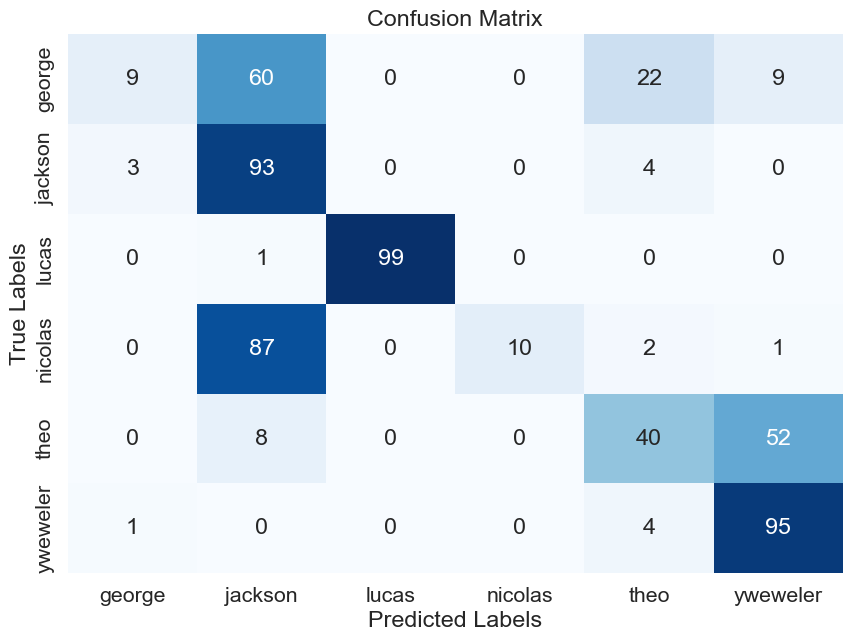

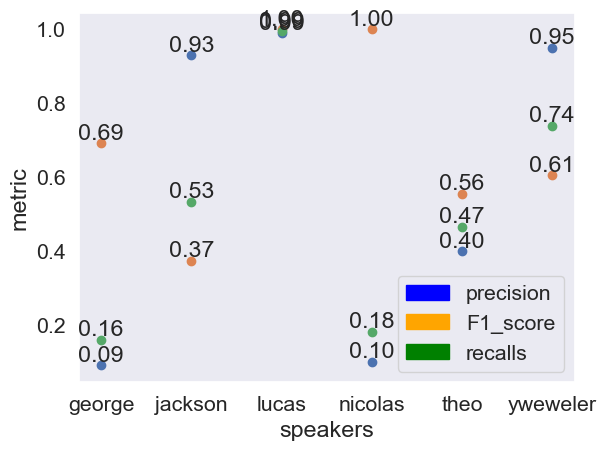

george:
Precision: 0.09
Recall: 0.69
F1 Score: 0.16

jackson:
Precision: 0.93
Recall: 0.37
F1 Score: 0.53

lucas:
Precision: 0.99
Recall: 1.00
F1 Score: 0.99

nicolas:
Precision: 0.10
Recall: 1.00
F1 Score: 0.18

theo:
Precision: 0.40
Recall: 0.56
F1 Score: 0.47

yweweler:
Precision: 0.95
Recall: 0.61
F1 Score: 0.74

accuract: 0.5766666666666667


In [119]:
cm = make_confusion_matrix(genre_lists_trans)
evaluation()

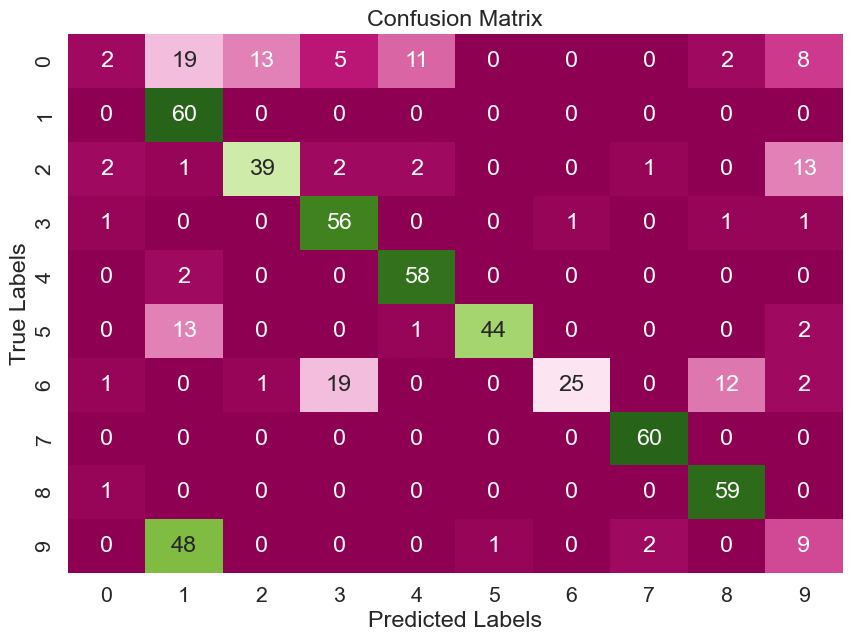

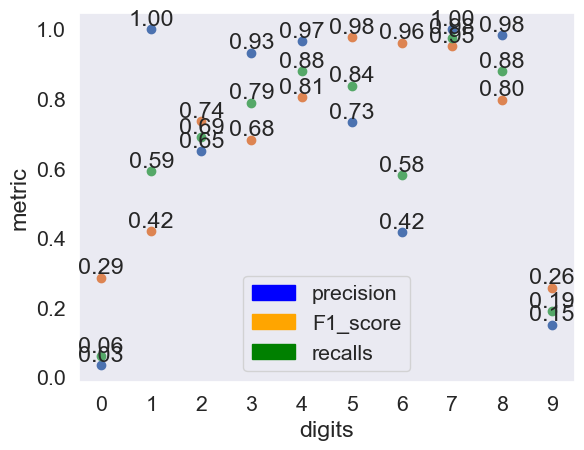

0:
Precision: 0.03
Recall: 0.29
F1 Score: 0.06

1:
Precision: 1.00
Recall: 0.42
F1 Score: 0.59

2:
Precision: 0.65
Recall: 0.74
F1 Score: 0.69

3:
Precision: 0.93
Recall: 0.68
F1 Score: 0.79

4:
Precision: 0.97
Recall: 0.81
F1 Score: 0.88

5:
Precision: 0.73
Recall: 0.98
F1 Score: 0.84

6:
Precision: 0.42
Recall: 0.96
F1 Score: 0.58

7:
Precision: 1.00
Recall: 0.95
F1 Score: 0.98

8:
Precision: 0.98
Recall: 0.80
F1 Score: 0.88

9:
Precision: 0.15
Recall: 0.26
F1 Score: 0.19

accuract: 0.6866666666666666


In [129]:
cm = make_confusion_matrix(genre_lists_trans)
evaluation()

## 3)Implementing from Scratch

In [50]:
import numpy as np
from scipy.stats import multivariate_normal
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import pickle
import math
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix,precision_score, recall_score
from sklearn.metrics import f1_score as calculate_f1_score
import seaborn as sb
import re

In [84]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:, 0] = self.initial_prob[:, 0] * observation_matrix[:, 0]
            else:
                alpha[:, t] = (self.transition_matrix.T @ alpha[:, t-1]) * observation_matrix[:, t]

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = self.transition_matrix @ (beta[:,t+1] * observation_matrix[:,t+1])
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = multivariate_normal.pdf(obs.T,mean =self.mean[:,s],cov = self.covariances[:,:,s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = alpha[:,t] @ (beta[:,t+1].T * B[:,t+1].T) * self.transition_matrix
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:,t] * beta[:,t]
            gamma[:, t] = self._normalize(partial_g)
        partial_g = alpha[:,T-1] * beta[:,T-1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = np.reshape(gamma[:, 0],(-1,1))
        expected_transition = self._stochasticize(xi_sum)

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        # self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood

In [85]:
audio_files = sorted(glob('./voices/recordings/*'))

In [86]:
def path_to_pattern(path):
    pattern = r'(\d+)_([a-zA-Z]+)_(\d+)\.wav'
    found_pattern = re.search(pattern, path)
    all_features = found_pattern.groups()
    return {
        'number': int(all_features[0]),
        'speaker': all_features[1],
        'index': int(all_features[2])
    }


In [87]:
def analyse_audio(path):
    voice = path_to_pattern(path)
    y, sr = librosa.load(path)
    y_tr, index = librosa.effects.trim(y, top_db=TOP_DB)
    mfcc = np.array(librosa.feature.mfcc(y=y_tr, sr=sr, n_mfcc=13))
    voice['sr'] = sr
    voice['y'] = y
    voice['y trim'] = y_tr
    voice['mfcc'] = mfcc.T
    return voice

In [88]:
all_mfccs = [analyse_audio(file) for file in audio_files]
df = pd.DataFrame(all_mfccs)


In [89]:
def make_datas(df, par_main, par_side, test_percent=TEST_SIZE):
    '''[par_main][par_side] = mfcc'''
    all_train = dict()
    all_test = dict()
    for i in df[par_main].unique():
        temp_train = []
        temp_test = []
        for j in df[par_side].unique():
            filtered_data = np.array(df[(df[par_main] == i) & (df[par_side] == j)]['mfcc'])
            test_size = int(len(filtered_data) * test_percent)
            temp_train.append(filtered_data[:-test_size])
            temp_test.append(filtered_data[-test_size:])
        all_train[i] = np.concatenate(temp_train)
        all_test[i] = np.concatenate(temp_test)
    return all_train, all_test

In [90]:
def train_hmm(train:dict, num_of_hidden_states=3) -> dict:
    all_hmms = dict()
    for feature in train.keys():
        prepared_train = np.concatenate(np.array(train[feature])).T
        hmm = HMM(num_hidden_states=num_of_hidden_states)
        hmm.train(prepared_train, num_iterations=10)
        all_hmms[feature] = hmm
    return all_hmms

In [91]:
def test_hmm(test:dict, all_hmms:dict) -> dict:
    scores = dict()
    for feature in test.keys():
        scores[feature] = []
        for data in test[feature]:
            temp_scores = dict()
            for model in all_hmms.keys():
                temp_scores[model] = all_hmms[model].score(data.T)
            pred_label = max(temp_scores, key=lambda model: temp_scores[model])
            scores[feature].append(pred_label)
    return scores

In [92]:
def draw_confusion(confusion_df,color):
    ax = sns.heatmap(confusion_df, annot=True, linewidth=0.5, fmt='0',cmap = color)
    ax.set(xlabel="Predicted Labels", ylabel="True Labels")
    ax.invert_yaxis()

In [93]:
def calculate_confusion(pred_labels):
    result_matrix = {i:
        {j:
            pred_labels[i].count(j)
            for j in pred_labels.keys()} 
        for i in pred_labels.keys()}
    return pd.DataFrame(result_matrix)

In [94]:
def convert_confusion_to_T_F_P_N(confusion_df):
    confusion_matrix = confusion_df.to_numpy()
    m = {list(pred_labels.keys())[i]:
        {
            'TP': confusion_matrix[i,i],
            'FP': np.sum(confusion_matrix[i,:]) - confusion_matrix[i,i],
            'FN': np.sum(confusion_matrix[:,i]) - confusion_matrix[i,i]
        }
        for i in range(len(list(pred_labels.keys())))}
    return pd.DataFrame(m).transpose()

In [95]:
def calculate_score(T_F_P_N_df, confusion_df):
    precision = T_F_P_N_df['TP'] / (T_F_P_N_df['TP'] + T_F_P_N_df['FP'])
    recall = T_F_P_N_df['TP'] / (T_F_P_N_df['TP'] + T_F_P_N_df['FN'])
    f1 = 2 * precision * recall / (precision + recall)
    return pd.DataFrame({'F1': f1, 'precision': precision, 'recall': recall})

In [96]:
def calculate_micro_macro(df, confusion_df):
    confusion_matrix = confusion_df.to_numpy()
    accuracy = np.sum(np.diagonal(confusion_matrix)) / np.sum(confusion_matrix)
    
    out = {'macro':{
        'accuracy': accuracy,
        'precision': np.mean(df['precision']),
        'recall': np.mean(df['recall'])
    },
     'micro':{
        'accuracy': accuracy,
        'precision': np.sum(df['TP']) / (np.sum(df['TP']) + np.sum(df['FP'])),
        'recall': np.sum(df['TP']) / (np.sum(df['TP']) + np.sum(df['FN']))
    }}
    
    for i in out.keys():
        out[i]['F1'] = 2 * out[i]['precision'] * out[i]['recall'] / (out[i]['precision'] + out[i]['recall'])
    return pd.DataFrame(out).transpose()

In [97]:
def analyse_result(pred_labels,color):
    confusion_df = calculate_confusion(pred_labels)
    draw_confusion(confusion_df,color)
    T_F_P_N_df = convert_confusion_to_T_F_P_N(confusion_df)
    score_df = calculate_score(T_F_P_N_df, confusion_df)
    df = pd.concat([T_F_P_N_df, score_df], axis=1)
    total_df = calculate_micro_macro(df, confusion_df)
    display(df)
    display(total_df)

,TP,FP,FN,F1,precision,recall
0,36,10,24,0.679245,0.782609,0.600000
1,53,7,7,0.883333,0.883333,0.883333
2,45,12,15,0.769231,0.789474,0.750000
3,44,30,16,0.656716,0.594595,0.733333
4,56,5,4,0.925620,0.918033,0.933333
5,54,8,6,0.885246,0.870968,0.900000
6,38,19,22,0.649573,0.666667,0.633333
7,58,6,2,0.935484,0.906250,0.966667
8,56,7,4,0.910569,0.888889,0.933333
9,51,5,9,0.879310,0.910714,0.850000


,accuracy,precision,recall,F1
macro,0.818333,0.821153,0.818333,0.819741
micro,0.818333,0.818333,0.818333,0.818333


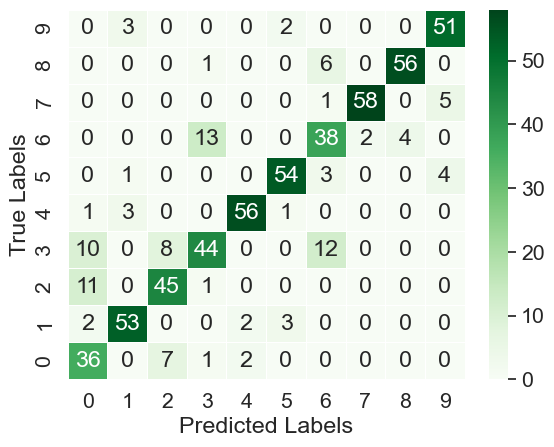

In [98]:
training_data, testing_data = make_datas(df, 'number', 'speaker')
all_hmms = train_hmm(training_data, num_of_hidden_states =6)
pred_labels = test_hmm(testing_data, all_hmms)
analyse_result(pred_labels,"Greens")

,TP,FP,FN,F1,precision,recall
george,100,8,0,0.961538,0.925926,1.00
jackson,82,2,18,0.891304,0.976190,0.82
lucas,95,0,5,0.974359,1.000000,0.95
nicolas,100,2,0,0.990099,0.980392,1.00
theo,85,8,15,0.880829,0.913978,0.85
yweweler,94,24,6,0.862385,0.796610,0.94


,accuracy,precision,recall,F1
macro,0.926667,0.932183,0.926667,0.929417
micro,0.926667,0.926667,0.926667,0.926667


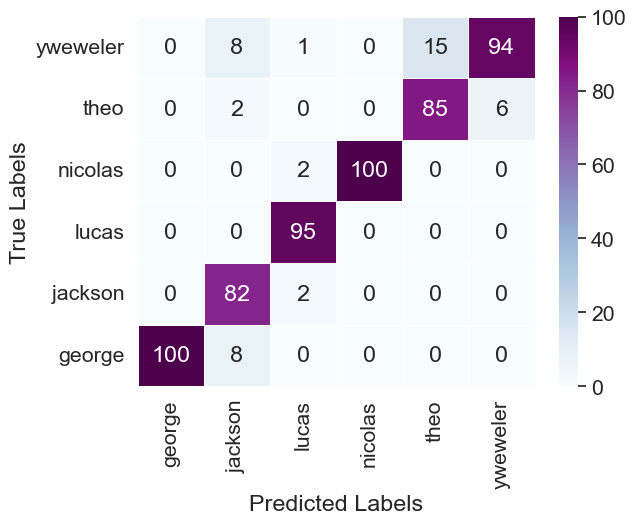

In [99]:
training_data, testing_data = make_datas(df, 'speaker', 'number')
all_hmms = train_hmm(training_data,num_of_hidden_states=10)
pred_labels = test_hmm(testing_data, all_hmms)
analyse_result(pred_labels,"BuPu")

## 4) Evaluation

### Q1 & Q3. Explain how each of the criteria evaluates the model.

**Accuracy:**
Accuracy measures the fraction of predictions our model got right. In other words, it is the number of correct predictions divided by the total number of predictions. It gives a straightforward indication of the model’s overall correctness but doesn’t take into account the balance of classes or the costs of different types of errors.

Formula: $$( \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} )$$

where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

**Precision:**
Precision focuses on the proportion of positive identifications that were actually correct. It’s a measure of the quality of the positive predictions, meaning it’s a key metric when the cost of a false positive is high.

Formula: $$( \text{Precision} = \frac{TP}{TP + FP} )$$

**Recall:**
Recall, also known as sensitivity, measures the proportion of actual positives that were identified correctly. This metric is particularly important when the cost of a false negative is high.

Formula: $$( \text{Recall} = \frac{TP}{TP + FN} )$$

**F1 Score:**
The F1 score is a harmonic mean of precision and recall, providing a balance between them. It’s particularly useful when you need to take both false positives and false negatives into account. The F1 score is maximized when precision and recall are both high, therefore it is handy when we need to find a balance between precision and recall.

Formula: $$( \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} )$$

To evaluate a model:

Accuracy evaluates the overall correctness across all classes.
Precision evaluates how reliable a model is when it predicts a positive result.
Recall evaluates how well the model captures all relevant instances.
F1 Score evaluates the balance between precision and recall in a single value.

### Q2. Does calculating the above criterias for this multiclass project have challanges? If yes,what is your solution?

Calculating metrics like Precision, Recall, F1-Score, and Accuracy for multi-class classification projects indeed poses some challenges. These challenges arise primarily due to the need to evaluate the performance of the model across multiple classes, which may have imbalanced distribution or varying levels of classification difficulty. Here are some common challenges and potential solutions:

1. **Imbalanced Classes:** Often, datasets may have a disproportionate number of instances for different classes. This imbalance can lead to metrics that don't accurately reflect the model's performance across all classes.

2. **Solution:** One approach is to use weighted versions of metrics like Precision, Recall, and F1-Score, where each class's metric is weighted by its presence in the dataset. This approach gives a more balanced view of the model's performance across all classes.

1. **Macro vs. Micro Averaging:** For multi-class classification, metrics can be calculated in two ways: macro-averaging (calculating the metric independently for each class and then taking the average) and micro-averaging (aggregating the contributions of all classes to compute the average metric).

2. **Solution:** The choice between macro and micro averaging depends on the project's specific needs. Macro averaging treats all classes equally, emphasizing the performance on less frequent classes. Micro averaging, on the other hand, gives a performance measure that’s more reflective of the model's ability to classify all samples correctly, heavily influenced by the model's performance on the majority class. Using both can provide a comprehensive view of the model's performance.

1. **Handling Multi-label Classification:** If a project involves multi-label classification (where each instance may belong to multiple classes simultaneously), traditional metrics need to be adjusted accordingly.

2. **Solution:** If a project involves multi-label classification (where each instance may belong to multiple classes simultaneously), traditional metrics need to be adjusted accordingly.

1. **Choosing the Right Metric:** Different metrics emphasize different aspects of model performance (e.g., Precision emphasizes the quality of positive predictions, while Recall emphasizes the coverage of actual positive instances).

2. **Solution:** It's crucial to choose metrics that align with the project's objectives. For balanced evaluation, combining multiple metrics or using composite metrics like the F1-Score can provide a more holistic view of model performance.

1. **In summary:** While evaluating multi-class classification models presents challenges, these can be addressed by choosing appropriate metrics and averaging methods that align with the project's goals and the nature of the data. Adjusting for class imbalance and considering the specific requirements of the project (e.g., whether precision is more important than recall) are essential steps in obtaining a meaningful evaluation of model performance.rmance.








### More about Macro,Micro and Weighted Averaging:
Macro, Micro, and Weighted averaging are techniques used to calculate performance metrics for classification models.

1. **Macro Averaging**:
   - In macro averaging, you calculate the metric independently for each class and then take the average (hence treating all classes equally). This method does not take class imbalance into account. If the dataset is significantly imbalanced, macro averaging will reflect the performance of the minority class in the overall evaluation. Macro averaging treats all classes equally regardless of their frequency.
   
   For instance, the macro-averaged F1 Score is calculated by computing the F1 Score for each class, then taking the average:

   $[ \text{Macro F1} = \frac{1}{N} \sum_{i=1}^{N} F1_i ]$
   
   Where $( F1_i )$ is the F1 Score for class $( i )$ and $( N )$ is the number of classes.

2. **Micro Averaging**:
   - Micro averaging aggregates the contributions of all classes to compute the average metric. In the case of F1 Score, for example, you would sum up the individual true positives, false positives, and false negatives for the model as a whole, regardless of class, and then calculate precision, recall, and F1 on these totals.
   
   Micro averaging is often used when you want to give each instance equal weight - effectively giving larger classes more weight in the overall metric, as they contribute more to the sums of TP, FP, and FN:

   $[ \text{Micro F1} = 2 \times \frac{\text{Total TP}}{\text{Total TP} + \text{Total FP} + \text{Total FN}} ]$

3. **Weighted Averaging**:
   - Weighted averaging also calculates metrics for each class separately, but when taking the average, each class's metric is weighted by the number of true instances for each class. This approach takes class imbalance into account, giving more weight to the majority class.
   
   This averaging method tosses a lifeline to imbalanced datasets. Each class's score is multiplied by the number of true instances in the class, summed up, and then divided by the total number of instances:

   $[ \text{Weighted F1} = \frac{1}{\text{Total Number of Instances}} \sum_{i=1}^{N} \text{Number of Instances in Class } i \times F1_i ]$

Each averaging technique provides a different view of the model's overall performance and can yield significantly different results. The choice of which averaging method to use typically depends on your concern for class imbalance and the importance of each class to the problem domain:

- **Use Macro averaging** when you want to treat all classes equally, regardless of their size.
- **Use Micro averaging** when you want to give weight to the performance on each individual instance, giving more impact to larger classes.
- **Use Weighted averaging** when you want to take the class imbalance into account in the metrics, thus giving more impact to larger classes but still accounting for each class's performance.

### Q4. Decribe differenccess between Precision and Recall.

**Precision:**

Precision is all about exactness and specificity. It tells you how many of the items identified as positive by the model are actually positive.
It evaluates the model’s ability to avoid labeling as positive a sample that is negative.
Precision is about quality—of all the instances classified as positive, how many are truly positive?
Precision can be seen as a measure of a classifier’s exactness. A lower precision score indicates a higher number of false positives.
Precision is more important in situations where false positives are more consequential than false negatives.

**Recall:**

Recall, on the other hand, is about completeness or sensitivity. It assesses how well the model can identify all relevant cases within a dataset.
It checks the model’s ability to find all the actual positives.
Recall is about coverage—of all the actual positives in the data, how many did we correctly identify?
Recall can be seen as a measure of a classifier’s thoroughness. A lower recall score indicates a higher number of false negatives.
Recall is critical in situations where missing a positive is significantly worse than incorrectly identifying a negative (e.g., in disease screening).

### Q5. What kind of averaging does the F1 criterion use? What is the difference between this type of averaging and normal averaging and why is it important here?


1. **Penalizes Extreme Values More**:
   - It gives a more significant weight to lower values. This means that if either precision or recall is low, the F1 score will also be low. Consequently, the F1 Score is only high when both precision and recall are high.
   - In contrast, the arithmetic mean (normal averaging) treats all values equally. If we simply averaged precision and recall, we could end up with a high mean if one of the metrics is very high, which could mask the fact that the other is low.

2. **Useful for Imbalanced Classes**:
   - In cases where class distributions are imbalanced, a model might have a high accuracy by merely predicting the majority class. However, this doesn't reflect the model's ability to accurately identify the minority class. As the harmonic mean of precision and recall, the F1 Score takes into account the performance on the minority class due to its sensitivity to low values (those cases which are often the positive class in imbalanced datasets).

3. **Encourages Balance**:
   - The harmonic mean is more appropriate for rates, which precision and recall are. Because precision and recall are proportions, their harmonic mean will be closer to the two values if they're similar and will penalize situations where there is a large discrepancy between them. It is less than the arithmetic mean unless all values are equal, at which point they equal each other.

4. **Adjustment for Skewed Datasets**:
   - In real-world scenarios, datasets are often skewed (imbalanced), and the cost of false positives and false negatives vary. In these cases, considering only precision or recall might lead to erroneous conclusions about the model's performance. The harmonic mean inherently balances the two metrics, which is particularly important when you want to account for both types of misclassification errors adequately.


### Q6. Prepare your model based on (target var = "digit") .Draw Confusion Matrix and Calculate Accuracy and Precission .Analyze the obtained results.
As calculated and above,the average precession is almost about 80% but for some digits like 3 and 6 is lower than the others.In the other criterias 3 and 6 are lower than others too.
The matrix and the values are drawn above.

### Q7 Prepare your model based on (target var = "SpeakerName") .Draw Confusion Matrix and Calculate Accuracy and Precission .Analyze the obtained results.
As calculated and above,the average precession is almost about 90% but for yweweler is about 80%.Yweweler in other criterias is almost less accurate .
The matrix and the values are drawn above.

### Q8. Examine the difference between parts 6 & 7 and exlpain the reasons . 

The hmmlearn model distinguishes itself with a built-in convergence monitor, a feature that intelligently determines the optimal point to halt training. This stands in stark contrast to our model that relies on a predetermined, rigid iteration limit, which may not capture the most accurate state of the model. The restricted efficiency of our approach does not allow for the lengthier, potentially more fruitful training sessions that the hmmlearn model can undertake. Furthermore, it is probable that the hmmlearn model benefits from a more sophisticated approach to selecting hyperparameters and a meticulous data preprocessing routine, both of which contribute to its superior predictive accuracy.

We have six speakers and ten digits.So we have more data for each person(the proportion is 10/6).As we can see , the results for speakers are more accurate because of more information.And So the total results.